<a href="https://colab.research.google.com/github/Confidentrf/DeepLearning/blob/modules/BasicModelWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
feats = pd.read_csv('OSI_feats (1).csv')
target = pd.read_csv('OSI_target (1).csv')

In [3]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=test_size, random_state=random_state)

In [4]:
from keras.models import Sequential
import numpy as np
from tensorflow import random

np.random.seed(42)
random.set_seed(42)
model = Sequential()

In [5]:
from keras.layers import Dense
model.add(Dense(1, input_dim=X_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from keras.layers import Activation
model.add(Activation('sigmoid'))

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              69 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
history = model.fit(X_train, y_train['Revenue'], epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2908 - loss: 76.1953 - val_accuracy: 0.7836 - val_loss: 1.8224
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 1.7048 - val_accuracy: 0.8424 - val_loss: 1.2432
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8318 - loss: 1.2705 - val_accuracy: 0.8652 - val_loss: 0.9992
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8495 - loss: 1.0114 - val_accuracy: 0.8611 - val_loss: 0.7435
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.7786 - val_accuracy: 0.8723 - val_loss: 0.5342
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8707 - loss: 0.5913 - val_accuracy: 0.8809 - val_loss: 0.3913
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8783 - loss: 0.4347 - val_accuracy: 0.8834 - val_loss: 0.3705
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8791 - loss: 0.3632 - val_accuracy: 0

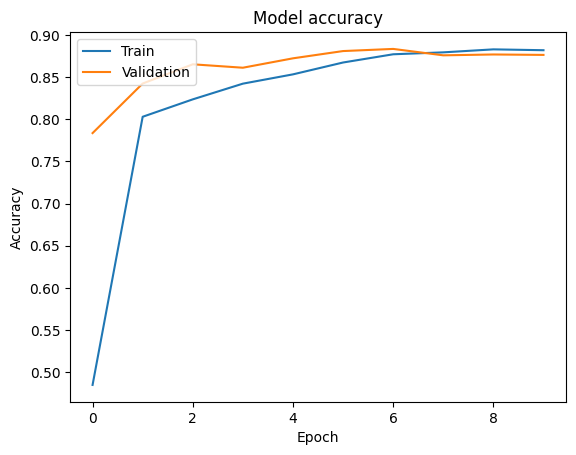

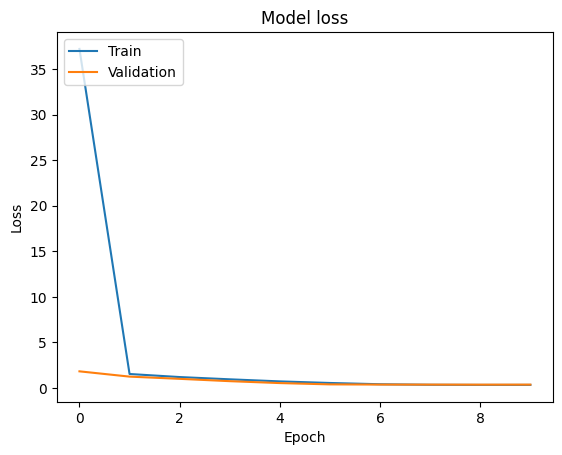

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test['Revenue'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8623 - loss: 0.4279
The loss on the test set is 0.4252 and the accuracy is 86.415%
